# Data Preprocessing of Titanic Dataset

## Import Data and Moduls






In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("titanic.csv")
df_original = df

## Know Your Data

In [4]:
df_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
#NORMALİZE ETMEM SKORU DÜŞÜRDÜ???

#df_original['Fare'] = (df_original['Fare'] - df_original['Fare'].mean())/df_original['Fare'].std()
#def normalize(dataset):
 #   dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
  #  return dataNorm

#df_original['Fare'] = normalize(df_original['Fare'])
#df_original

In [6]:
df_original.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## See Your Data

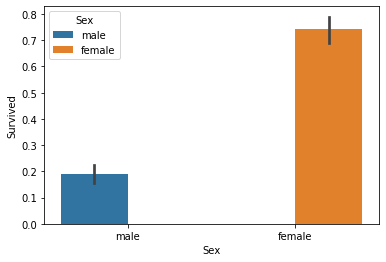

In [8]:
#Hayatta kalma oranının kadınlarda daha fazla olduğunu yani kadınlara öncelik verildiğini gözlemleyebiliriz.
a=sns.barplot(x="Sex", y="Survived", hue="Sex", data=df_original);

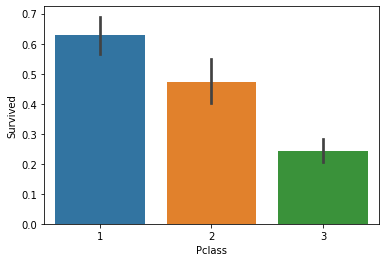

In [9]:
# Alt sınıflarda olanların daha az hayatta kaldığını gözlemleyebiliriz.
sns.barplot(x="Pclass", y="Survived", data=df_original);

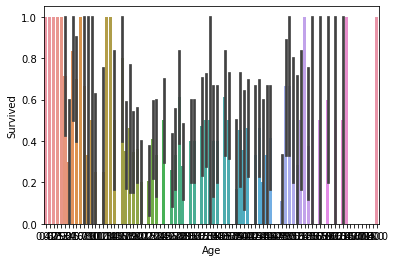

In [10]:
#Buradan ise yaşlı ve çocuklara öncelik verildiğini gözlemleyebiliriz.
sns.barplot(x="Age", y="Survived", data=df_original);

## One Hot Encoding For Categorical Features

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [17]:
#Pclass sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_original['Pclass'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Pclass = onehot_encoder.fit_transform(integer_encoded)

df_Pclass = pd.DataFrame(data=onehot_encoded_Pclass, columns=["1st","2nd","3rd"])
df_Pclass.head()

,1st,2nd,3rd
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [18]:
#Sex sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_original['Sex'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Sex = onehot_encoder.fit_transform(integer_encoded)

df_Sex = pd.DataFrame(data=onehot_encoded_Sex, columns=["Female", "Male"])
df_Sex.head()

,Female,Male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [19]:
#Survived sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_original['Survived'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Survived = onehot_encoder.fit_transform(integer_encoded)

df_Survived = pd.DataFrame(data=onehot_encoded_Survived, columns=["Dead", "Alive"])
df_Survived.head()

,Dead,Alive
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


## Fill the NaN Cells

--> Age değişkeninde toplam 177 missing value vardır.<br>
--> Cabin değişkeninde toplam 687 missing value vardır.<br>
--> Embarked değişkeninde toplam 2 missing value vardır.<br>

### Cabin Column

Bu sütundaki 891 verinin 687'i missing olduğundan ve olan verilerin de uniqe olmasından dolayı bu sütunu dataframe'den atmaya karar verdim.

In [20]:
df_original.drop(['Cabin'], inplace=True, axis=1)

### Embarked Column

In [21]:
df_original.Embarked.value_counts()
#Yalnızca 2 NaN olduğundan model kullanmadan direkt mod değeri ile doldurmak asıl modelimizi çok etkilemeyecektir.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
df_original['Embarked'] = df_original['Embarked'].fillna("S")

In [23]:
df_original.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
#Embarked sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_original['Embarked'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Embarked = onehot_encoder.fit_transform(integer_encoded)

df_Embarked = pd.DataFrame(data=onehot_encoded_Embarked, columns=["C", "Q","S"])
print(df_Embarked)

       C    Q    S
0    0.0  0.0  1.0
1    1.0  0.0  0.0
2    0.0  0.0  1.0
3    0.0  0.0  1.0
4    0.0  0.0  1.0
..   ...  ...  ...
886  0.0  0.0  1.0
887  0.0  0.0  1.0
888  0.0  0.0  1.0
889  1.0  0.0  0.0
890  0.0  1.0  0.0

[891 rows x 3 columns]


### Age Column

Age sütunu için KNN Modelini kullanarak 177 adet NaN değeri dolduracağız.

In [29]:
#KNN için X matrisi oluşturulur
df_AgeLR = df_original.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [30]:
df_AgeLR = df_AgeLR.drop(['Pclass', 'Sex', 'Embarked', 'Survived'], axis=1)
df_AgeLR.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [31]:
df_AgeLR = pd.concat([df_AgeLR, df_Embarked, df_Pclass, df_Sex, df_Survived], axis=1, sort=False)

In [32]:
df_AgeLR

,Age,SibSp,Parch,Fare,C,Q,S,1st,2nd,3rd,Female,Male,Dead,Alive
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
887,19.0,0,0,30.0000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
888,NaN,1,2,23.4500,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
889,26.0,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [33]:
df_AgeLR_noNaN = df_AgeLR.dropna()
df_AgeLR_noNaN

,Age,SibSp,Parch,Fare,C,Q,S,1st,2nd,3rd,Female,Male,Dead,Alive
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
886,27.0,0,0,13.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
887,19.0,0,0,30.0000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
889,26.0,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [34]:
df_AgeLR_Y = df_AgeLR_noNaN['Age']

In [35]:
df_AgeLR_X = df_AgeLR_noNaN.drop(['Age'], axis =1,inplace=False)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
LM = LinearRegression()
LM.fit(df_AgeLR_X, df_AgeLR_Y)
LM.coef_

array([-4.07886994, -0.77138148, -0.01969645, -2.23087864,  2.18450526,
        0.04637338,  9.70176357, -1.94129151, -7.76047206,  0.20667299,
       -0.20667299,  3.34670786, -3.34670786])

In [38]:
df_tmp = df_AgeLR.drop(['Age'], axis=1)
for i in range(df_AgeLR.shape[0]):
    if np.isnan(df_AgeLR.iloc[i,0]):
        df_AgeLR.iloc[i,0] = LM.predict(df_tmp.iloc[[i]])


In [39]:
df_AgeLR

,Age,SibSp,Parch,Fare,C,Q,S,1st,2nd,3rd,Female,Male,Dead,Alive
0,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26.000000,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
887,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
888,24.075249,1,2,23.4500,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
889,26.000000,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [40]:
df_original['Age'] = df_AgeLR['Age']

In [41]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Create Our Models

### Model After Filling Missing Values

In [42]:
X = df_AgeLR.drop(['Dead', 'Alive'], axis=1)
X.count()

Age       891
SibSp     891
Parch     891
Fare      891
C         891
Q         891
S         891
1st       891
2nd       891
3rd       891
Female    891
Male      891
dtype: int64

In [43]:
Y = df_original['Survived']
Y.count()

891

In [44]:
from sklearn.linear_model import LogisticRegression

In [53]:
LM_filled = LogisticRegression(max_iter=1000)

In [54]:
LM_filled.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
LM_filled.coef_

array([[-0.05125481, -0.42656269, -0.08979985,  0.00212771,  0.12246566,
         0.11533246, -0.23946188,  1.18165439,  0.05165385, -1.234972  ,
         1.32505356, -1.32671732]])

### Model After Drop NaN Rows

In [79]:
df_noNaN = pd.read_csv("titanic.csv")

In [80]:
#NORMALİZASYON SKOR DÜŞÜRDÜ???

#df_original['Fare'] = (df_original['Fare'] - df_original['Fare'].mean())/df_original['Fare'].std()
#def normalize(dataset):
#    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
#    return dataNorm

#df_noNaN['Fare'] = normalize(df_noNaN['Fare'])
#df_noNaN

In [81]:
df_noNaN.dropna(inplace=True)

In [82]:
Y = df_noNaN['Survived']
df_noNaN.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_noNaN

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,female,38.0,1,0,71.2833,C
3,1,female,35.0,1,0,53.1000,S
6,1,male,54.0,0,0,51.8625,S
10,3,female,4.0,1,1,16.7000,S
11,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542,S
872,1,male,33.0,0,0,5.0000,S
879,1,female,56.0,0,1,83.1583,C
887,1,female,19.0,0,0,30.0000,S


In [83]:
#Sex sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_noNaN['Sex'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Sex = onehot_encoder.fit_transform(integer_encoded)

df_Sex = pd.DataFrame(data=onehot_encoded_Sex, columns=["Female", "Male"])
df_Sex.head()

,Female,Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [84]:
#Embarked sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_noNaN['Embarked'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Embarked = onehot_encoder.fit_transform(integer_encoded)

df_Embarked = pd.DataFrame(data=onehot_encoded_Embarked, columns=["C", "Q","S"])
df_Embarked.head()

,C,Q,S
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [85]:
df_noNaN = df_noNaN.drop(['Sex', 'Embarked'], axis=1)
df_noNaN = df_noNaN.reset_index() #concat uygularken indexler sıkıntı çıkartıyor
df_noNaN

,index,Pclass,Age,SibSp,Parch,Fare
0,1,1,38.0,1,0,71.2833
1,3,1,35.0,1,0,53.1000
2,6,1,54.0,0,0,51.8625
3,10,3,4.0,1,1,16.7000
4,11,1,58.0,0,0,26.5500
...,...,...,...,...,...,...
178,871,1,47.0,1,1,52.5542
179,872,1,33.0,0,0,5.0000
180,879,1,56.0,0,1,83.1583
181,887,1,19.0,0,0,30.0000


In [86]:
df_noNaN = pd.concat([df_noNaN, df_Embarked, df_Sex], axis=1, sort=False)
df_noNaN.drop(['index'], axis=1, inplace = True)
df_noNaN

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
0,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
1,1,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
2,1,54.0,0,0,51.8625,0.0,0.0,1.0,0.0,1.0
3,3,4.0,1,1,16.7000,0.0,0.0,1.0,1.0,0.0
4,1,58.0,0,0,26.5500,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
178,1,47.0,1,1,52.5542,0.0,0.0,1.0,1.0,0.0
179,1,33.0,0,0,5.0000,0.0,0.0,1.0,0.0,1.0
180,1,56.0,0,1,83.1583,1.0,0.0,0.0,1.0,0.0
181,1,19.0,0,0,30.0000,0.0,0.0,1.0,1.0,0.0


In [87]:
LM_dropped = LogisticRegression(max_iter=1000)

In [88]:
LM_dropped.fit(df_noNaN,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
LM_dropped.coef_

array([[-0.48601563, -0.03899233,  0.14278798, -0.36803433,  0.00153956,
         0.32822868, -0.31132314, -0.01355215,  1.29290351, -1.28955012]])

## Prepare Test Set

In [90]:
df_test = pd.read_csv('test.csv')

In [91]:
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [92]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [93]:
#Pclass sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_test['Pclass'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Pclass = onehot_encoder.fit_transform(integer_encoded)

df_Pclass = pd.DataFrame(data=onehot_encoded_Pclass, columns=["1st","2nd","3rd"])
df_Pclass.head()

,1st,2nd,3rd
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [94]:
#Sex sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_test['Sex'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Sex = onehot_encoder.fit_transform(integer_encoded)

df_Sex = pd.DataFrame(data=onehot_encoded_Sex, columns=["Female", "Male"])
df_Sex.head()

,Female,Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [95]:
#Embarked sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_test['Embarked'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Embarked = onehot_encoder.fit_transform(integer_encoded)

df_Embarked = pd.DataFrame(data=onehot_encoded_Embarked, columns=["C", "Q","S"])
df_Embarked.head()

,C,Q,S
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [96]:
df_test = pd.concat([df_test, df_Embarked, df_Pclass, df_Sex], axis=1, sort=False)

In [97]:
df_test.drop(['Embarked', 'Pclass', 'Sex'], axis=1, inplace=True)

In [98]:
df_test_train = df_test.dropna()

In [99]:
df_test_train_X = df_test_train.drop(['Age'], axis=1)

In [100]:
LM = LinearRegression()
LM.fit(df_test_train_X, df_test_train['Age'])
LM.coef_

array([-1.476962  , -0.60511252,  0.02047338, -2.46452383,  3.21100555,
       -0.74648172,  9.52364949, -2.447822  , -7.07582749, -1.0670555 ,
        1.0670555 ])

In [101]:
df_tmp = df_test.drop(['Age'], axis=1)
for i in range(df_test.shape[0]):
    if np.isnan(df_test.iloc[i,0]):
        df_test.iloc[i,0] = LM.predict(df_tmp.iloc[[i]])


In [102]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   SibSp   418 non-null    int64  
 2   Parch   418 non-null    int64  
 3   Fare    418 non-null    float64
 4   C       418 non-null    float64
 5   Q       418 non-null    float64
 6   S       418 non-null    float64
 7   1st     418 non-null    float64
 8   2nd     418 non-null    float64
 9   3rd     418 non-null    float64
 10  Female  418 non-null    float64
 11  Male    418 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 39.3 KB


In [103]:
filled_preds = LM_filled.predict(df_test)

In [104]:
print(filled_preds)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [105]:
df_cevap = pd.read_csv("cevap.csv")

In [106]:
df_cevap['Survived'] = filled_preds

In [107]:
df_cevap.to_csv("cevap.csv")

In [108]:
################################################################################3

In [109]:
df_test_noNaN = pd.read_csv('test.csv')
df_test_noNaN

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [110]:
df_test_noNaN = df_test_noNaN.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1)
df_test_noNaN['Age'] = df_test['Age']

In [111]:
df_test_noNaN['Fare'] = df_test_noNaN['Fare'].fillna(df_test_noNaN['Fare'].mean())

In [112]:
df_test_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [113]:
df_test_noNaN = pd.concat([df_test_noNaN, df_Embarked, df_Sex], axis=1, sort=False)

In [114]:
df_test_noNaN

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
0,3,34.500000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,3,47.000000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,2,62.000000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,3,27.000000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,3,22.000000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,3,25.402974,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1,39.000000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,3,38.500000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,3,25.402974,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [115]:
noNaNPreds = LM_dropped.predict(df_test_noNaN)

In [116]:
df_cevap_drop = pd.read_csv("cevap.csv")

In [117]:
df_cevap_drop['Survived'] = noNaNPreds

In [118]:
df_cevap_drop.to_csv("cevap_drop.csv")